In [2]:
import os,sys,json
from glob import glob

os.chdir('/home/avijit/projects/Awareness_vs_Unawareness')
sys.path.insert(0,"/home/avijit/projects/Awareness_vs_Unawareness/robustfairnesscode")

In [3]:
import warnings
warnings.filterwarnings('ignore')

from robustfairnesscode import data, losses, optimization, model, utils, dro_training, softweights_training
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import shap
import traceback

In [4]:
def writejson(path,arr,name):
    try:
        os.mkdir(path+'preds/')
    except:
        pass
    f = open(path+'preds/'+name,'w')
    json.dump(arr,f)
    f.close()

In [5]:
paths = {0:'data/datasets/publiccov_ca/',
         0.2:'data/datasets/publiccov_ca/synthetic/gender_flip_labels0.2_version0/',
         0.4:'data/datasets/publiccov_ca/synthetic/gender_flip_labels0.4_version0/',
         0.6:'data/datasets/publiccov_ca/synthetic/gender_flip_labels0.6_version0/',
         0.8:'data/datasets/publiccov_ca/synthetic/gender_flip_labels0.8_version0/'
        }

In [6]:
def dothings(model,name):
    session = tf.Session()
    session.run((tf.global_variables_initializer(),tf.local_variables_initializer()))
    
    def f(test_df):
        val = session.run(model.predictions_tensor,feed_dict=model.feed_dict_helper(test_df))
        vall = [float(v[0]) for v in val]
        val_m = [0 if i < 0 else 1 for i in vall]
        return val_m
    
    explainer = shap.Explainer(f, test_df)
    shap_values = explainer(test_df.sample(n=500))
    
    clist = list(FEATURE_NAMES)
    features = {}
    for i in range(len(clist)):
        fname = clist[i]
        item = fname.split('_')[0]
        if item not in features:
            features[item]=[]
        features[item].append(i)
    newshap = {}
    for k in features:
        nshap = []
        for x in shap_values.values:
            val = 0
            for i in features[k]:
                val+= x[i]
            nshap.append(val)
        newshap[k] = nshap
    new_shap_values = list(zip(*newshap.values()))
    shap_values.values = np.array(new_shap_values)
    shap_values.feature_names = list(features.keys())
    
    f = open('SavedShap/'+name+'.pkl','wb')
    pickle.dump(shap_values,f)
    f.close()
    
    
    shap.plots.bar(shap_values,max_display=18)
    
    

Index(['SCHL_1 or more years of college credit, no degree',
       'SCHL_12th grade - no diploma', 'SCHL_Associate's degree',
       'SCHL_Bachelor's degree', 'SCHL_Doctorate degree',
       'SCHL_GED or alternative credential', 'SCHL_Grade 1', 'SCHL_Grade 10',
       'SCHL_Grade 11', 'SCHL_Grade 2', 'SCHL_Grade 3', 'SCHL_Grade 4',
       'SCHL_Grade 5', 'SCHL_Grade 6', 'SCHL_Grade 7', 'SCHL_Grade 8',
       'SCHL_Grade 9', 'SCHL_Kindergarten', 'SCHL_Master's degree',
       'SCHL_No schooling completed', 'SCHL_Nursery school, preschool',
       'SCHL_Professional degree beyond a bachelor's degree',
       'SCHL_Regular high school diploma',
       'SCHL_Some college, but less than 1 year', 'MAR_Divorced',
       'MAR_Married', 'MAR_Never married or under 15 years old',
       'MAR_Separated', 'MAR_Widowed', 'SEX_Female', 'SEX_Male',
       'DIS_With a disability', 'DIS_Without a disability',
       'ESP_Both parents in labor force', 'ESP_Father in the labor force',
       'ESP_Father 

Permutation explainer: 501it [00:19, 15.17it/s]                         


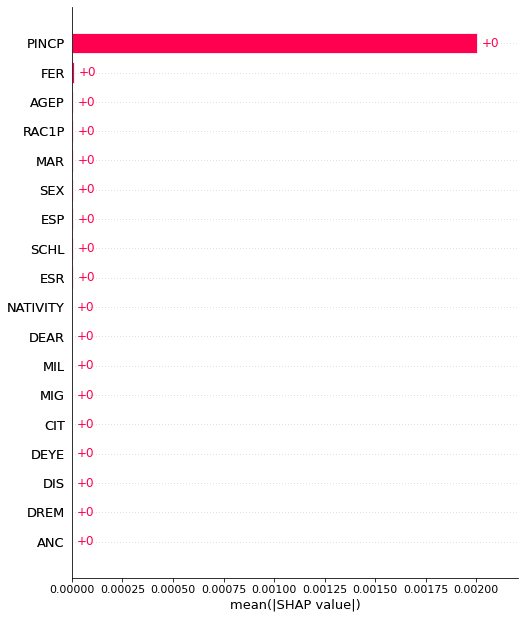

Split 1 of 1
time since start: 0.2598989009857178
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  5.388242721557617
tpr_overall 0.003155762799679714
fpr_overall 0.004339824758974923
tpr_overall 0.004128229957698385
fpr_overall 0.004257979990471653
tpr_overall 0.003993376838414337
fpr_overall 0.004758083008484293
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 26.921643495559692
time since start: 27.181580781936646
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  5.588513612747192
tpr_overall 0.0028260562385191467
fpr_overall 0.0040102178152

Permutation explainer: 501it [00:15, 11.60it/s]                         


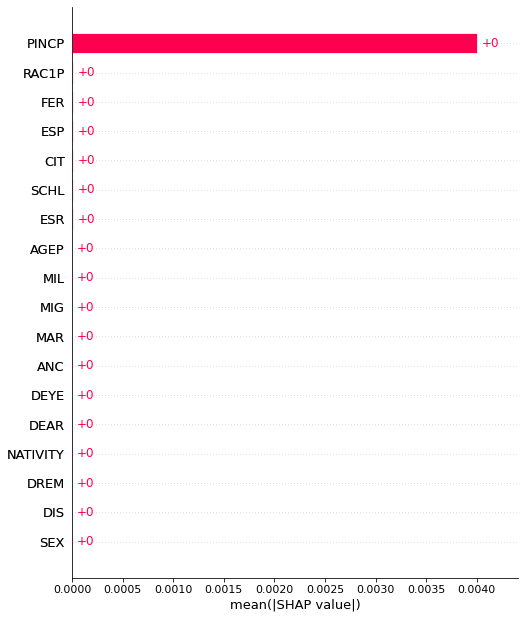

Index(['SCHL_1 or more years of college credit, no degree',
       'SCHL_12th grade - no diploma', 'SCHL_Associate's degree',
       'SCHL_Bachelor's degree', 'SCHL_Doctorate degree',
       'SCHL_GED or alternative credential', 'SCHL_Grade 1', 'SCHL_Grade 10',
       'SCHL_Grade 11', 'SCHL_Grade 2', 'SCHL_Grade 3', 'SCHL_Grade 4',
       'SCHL_Grade 5', 'SCHL_Grade 6', 'SCHL_Grade 7', 'SCHL_Grade 8',
       'SCHL_Grade 9', 'SCHL_Kindergarten', 'SCHL_Master's degree',
       'SCHL_No schooling completed', 'SCHL_Nursery school, preschool',
       'SCHL_Professional degree beyond a bachelor's degree',
       'SCHL_Regular high school diploma',
       'SCHL_Some college, but less than 1 year', 'MAR_Divorced',
       'MAR_Married', 'MAR_Never married or under 15 years old',
       'MAR_Separated', 'MAR_Widowed', 'SEX_Female', 'SEX_Male',
       'DIS_With a disability', 'DIS_Without a disability',
       'ESP_Both parents in labor force', 'ESP_Father in the labor force',
       'ESP_Father 

Permutation explainer: 501it [00:15, 11.88it/s]                         


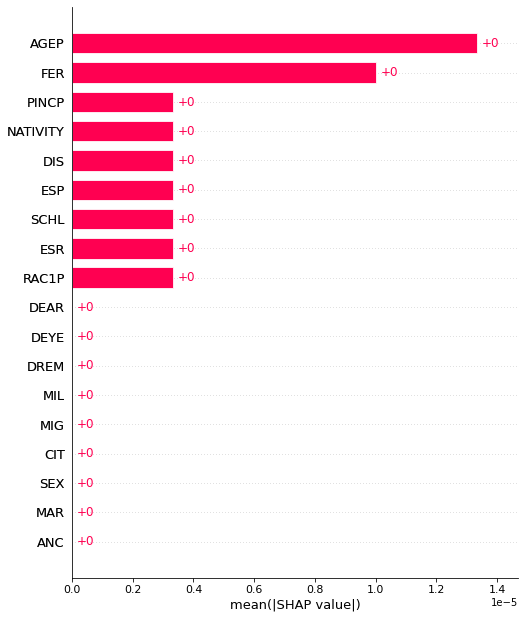

Split 1 of 1
time since start: 0.26215600967407227
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  5.153282880783081
tpr_overall 0.003950896006772965
fpr_overall 0.005058141133133573
tpr_overall 0.005041503284615776
fpr_overall 0.005272878932316492
tpr_overall 0.004696213677722336
fpr_overall 0.005546026300743282
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 26.489648580551147
time since start: 26.75184965133667
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  5.17382550239563
tpr_overall 0.0034805512440618976
fpr_overall 0.00461830277373

Permutation explainer: 501it [00:15, 11.62it/s]                         


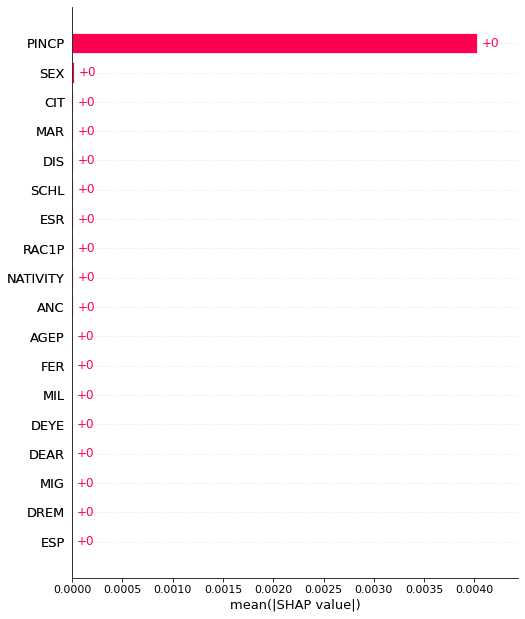

Index(['SCHL_1 or more years of college credit, no degree',
       'SCHL_12th grade - no diploma', 'SCHL_Associate's degree',
       'SCHL_Bachelor's degree', 'SCHL_Doctorate degree',
       'SCHL_GED or alternative credential', 'SCHL_Grade 1', 'SCHL_Grade 10',
       'SCHL_Grade 11', 'SCHL_Grade 2', 'SCHL_Grade 3', 'SCHL_Grade 4',
       'SCHL_Grade 5', 'SCHL_Grade 6', 'SCHL_Grade 7', 'SCHL_Grade 8',
       'SCHL_Grade 9', 'SCHL_Kindergarten', 'SCHL_Master's degree',
       'SCHL_No schooling completed', 'SCHL_Nursery school, preschool',
       'SCHL_Professional degree beyond a bachelor's degree',
       'SCHL_Regular high school diploma',
       'SCHL_Some college, but less than 1 year', 'MAR_Divorced',
       'MAR_Married', 'MAR_Never married or under 15 years old',
       'MAR_Separated', 'MAR_Widowed', 'SEX_Female', 'SEX_Male',
       'DIS_With a disability', 'DIS_Without a disability',
       'ESP_Both parents in labor force', 'ESP_Father in the labor force',
       'ESP_Father 

Permutation explainer: 501it [00:16, 11.35it/s]                         


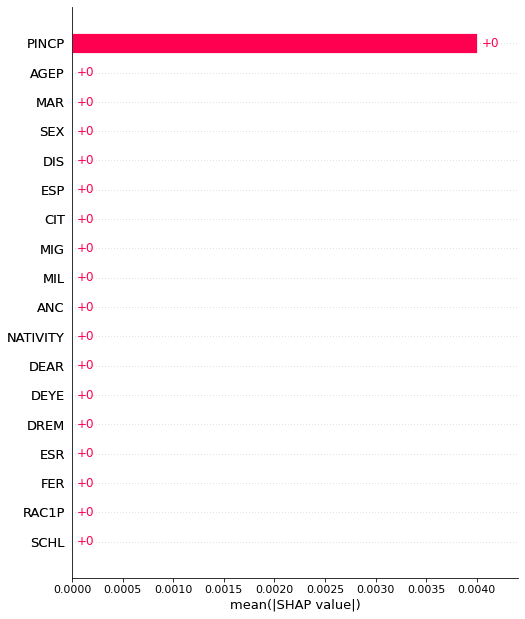

Split 1 of 1
time since start: 0.24295806884765625
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  5.214350461959839
tpr_overall 0.005411255411255411
fpr_overall 0.00549661957895894
tpr_overall 0.0048380525565288246
fpr_overall 0.006285561083142184
tpr_overall 0.006548724464861695
fpr_overall 0.005892448512585812
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 27.008614540100098
time since start: 27.251628875732422
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  5.201848983764648
tpr_overall 0.004470167513645775
fpr_overall 0.0051118562084

Permutation explainer: 501it [00:15, 11.85it/s]                         


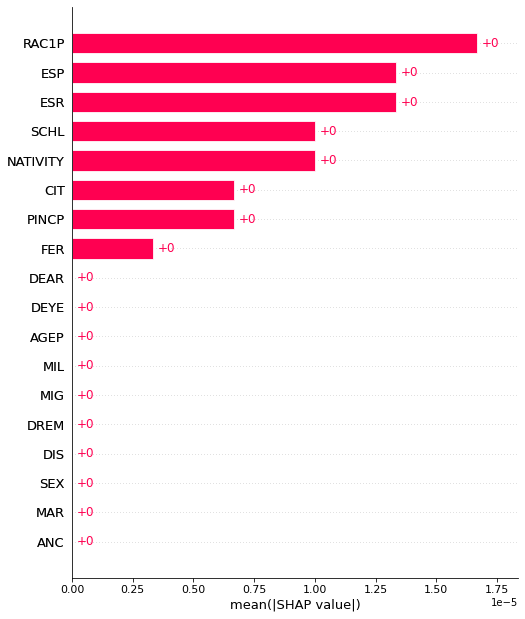

Index(['SCHL_1 or more years of college credit, no degree',
       'SCHL_12th grade - no diploma', 'SCHL_Associate's degree',
       'SCHL_Bachelor's degree', 'SCHL_Doctorate degree',
       'SCHL_GED or alternative credential', 'SCHL_Grade 1', 'SCHL_Grade 10',
       'SCHL_Grade 11', 'SCHL_Grade 2', 'SCHL_Grade 3', 'SCHL_Grade 4',
       'SCHL_Grade 5', 'SCHL_Grade 6', 'SCHL_Grade 7', 'SCHL_Grade 8',
       'SCHL_Grade 9', 'SCHL_Kindergarten', 'SCHL_Master's degree',
       'SCHL_No schooling completed', 'SCHL_Nursery school, preschool',
       'SCHL_Professional degree beyond a bachelor's degree',
       'SCHL_Regular high school diploma',
       'SCHL_Some college, but less than 1 year', 'MAR_Divorced',
       'MAR_Married', 'MAR_Never married or under 15 years old',
       'MAR_Separated', 'MAR_Widowed', 'SEX_Female', 'SEX_Male',
       'DIS_With a disability', 'DIS_Without a disability',
       'ESP_Both parents in labor force', 'ESP_Father in the labor force',
       'ESP_Father 

Permutation explainer: 501it [00:15, 11.27it/s]                         


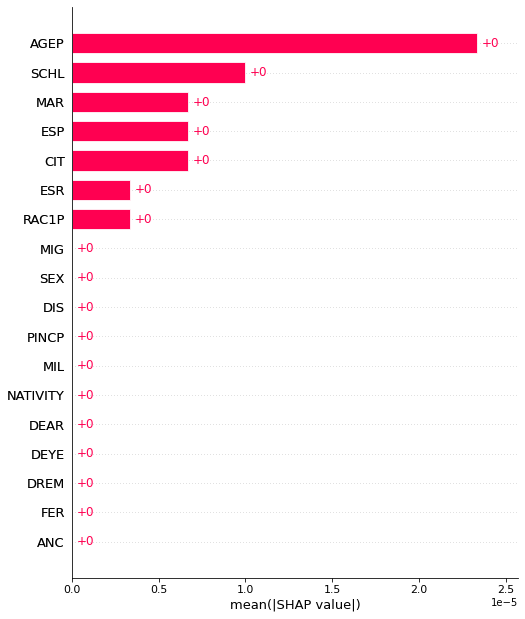

Split 1 of 1
time since start: 0.2370610237121582
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  5.184713125228882
tpr_overall 0.00645952190107973
fpr_overall 0.007274424222460128
tpr_overall 0.006850357740904247
fpr_overall 0.006866081557107887
tpr_overall 0.004508477898657257
fpr_overall 0.0059972583961617545
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 26.724051475524902
time since start: 26.961365938186646
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  5.300161600112915
tpr_overall 0.005799424772502239
fpr_overall 0.00667050975870

Permutation explainer: 501it [00:16, 11.36it/s]                         


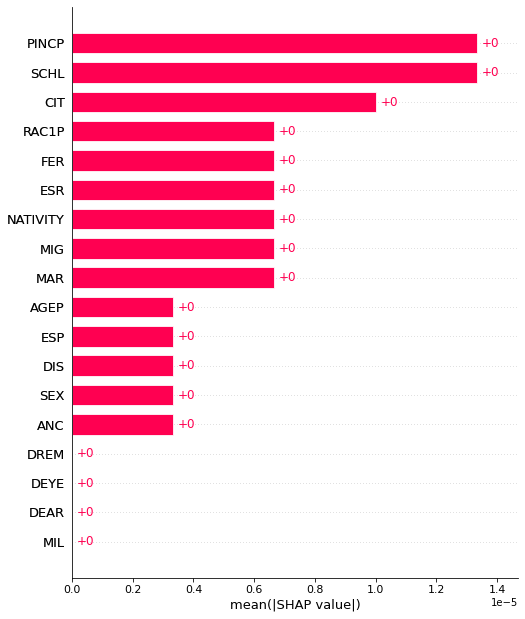

Index(['SCHL_1 or more years of college credit, no degree',
       'SCHL_12th grade - no diploma', 'SCHL_Associate's degree',
       'SCHL_Bachelor's degree', 'SCHL_Doctorate degree',
       'SCHL_GED or alternative credential', 'SCHL_Grade 1', 'SCHL_Grade 10',
       'SCHL_Grade 11', 'SCHL_Grade 2', 'SCHL_Grade 3', 'SCHL_Grade 4',
       'SCHL_Grade 5', 'SCHL_Grade 6', 'SCHL_Grade 7', 'SCHL_Grade 8',
       'SCHL_Grade 9', 'SCHL_Kindergarten', 'SCHL_Master's degree',
       'SCHL_No schooling completed', 'SCHL_Nursery school, preschool',
       'SCHL_Professional degree beyond a bachelor's degree',
       'SCHL_Regular high school diploma',
       'SCHL_Some college, but less than 1 year', 'MAR_Divorced',
       'MAR_Married', 'MAR_Never married or under 15 years old',
       'MAR_Separated', 'MAR_Widowed', 'SEX_Female', 'SEX_Male',
       'DIS_With a disability', 'DIS_Without a disability',
       'ESP_Both parents in labor force', 'ESP_Father in the labor force',
       'ESP_Father 

Permutation explainer: 501it [00:16, 11.15it/s]                         


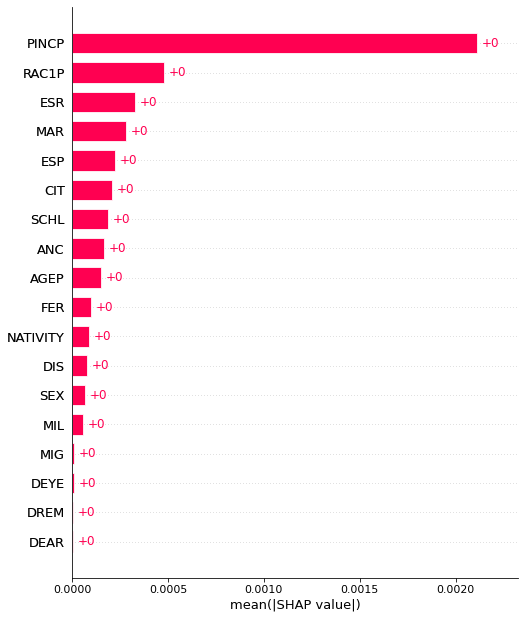

Split 1 of 1
time since start: 0.2505507469177246
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  5.658404588699341
tpr_overall 0.006447058823529412
fpr_overall 0.007172694294822469
tpr_overall 0.006231802625529958
fpr_overall 0.006601641489235161
tpr_overall 0.006607073455110766
fpr_overall 0.007061254951489753
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 27.857729196548462
time since start: 28.10833239555359
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  5.747232675552368
tpr_overall 0.0031058823529411766
fpr_overall 0.00442453556117

Permutation explainer: 501it [00:15, 11.19it/s]                         


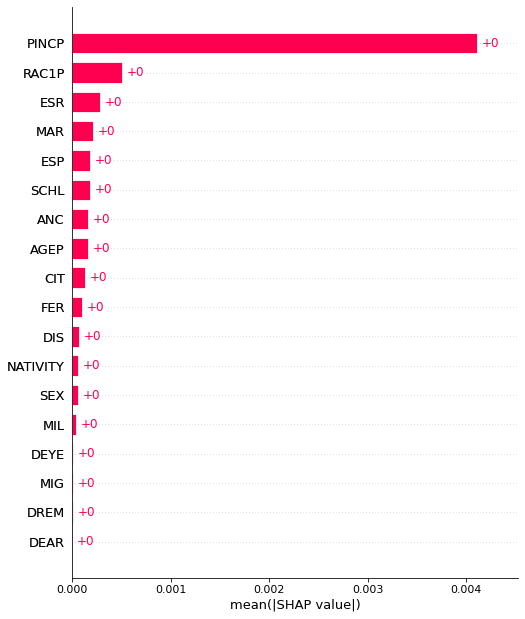

In [7]:
for frac in paths:
    path = paths[frac]
    
    train_df = pd.read_csv(path+'train.csv',header=None)

    train_df.columns = ['AGEP', 'SCHL', 'MAR', 'SEX', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
       'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'PINCP', 'ESR', 'FER', 'RAC1P',
       'PUBCOV']


    train_df = train_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    test_df = pd.read_csv(path+'test.csv',header=None)

    test_df.columns = ['AGEP', 'SCHL', 'MAR', 'SEX', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
       'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'PINCP', 'ESR', 'FER', 'RAC1P',
       'PUBCOV']

    X_train = train_df.drop(['PUBCOV'],axis=1)
    X_test = test_df.drop(['PUBCOV'],axis=1)

    Y_train = pd.Series(train_df['PUBCOV'])
    Y_test = pd.Series(test_df['PUBCOV'])

    Y_train = pd.Series(Y_train.factorize(sort=True)[0], index=Y_train.index)
    Y_test = pd.Series(Y_test.factorize(sort=True)[0], index=Y_test.index)

    X_merged = pd.concat([X_train,X_test])

    ohe = make_column_transformer(
        (OneHotEncoder(sparse=False), X_merged.dtypes == 'object'),
        remainder='passthrough', verbose_feature_names_out=False)

    X_merged_temp  = pd.DataFrame(ohe.fit_transform(X_merged), columns=ohe.get_feature_names_out(), index=X_merged.index)

    train_df  = pd.DataFrame(ohe.transform(X_train), columns=ohe.get_feature_names_out(), index=X_train.index)
    test_df = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out(), index=X_test.index)

    train_df['PUBCOV'] = Y_train
    test_df['PUBCOV'] = Y_test

    print(train_df.columns)

    LABEL_COLUMN = "PUBCOV"
    FEATURE_NAMES = list(train_df.columns)
    FEATURE_NAMES.remove(LABEL_COLUMN)
    PROTECTED_COLUMNS = ['SEX_Female','SEX_Male']

    PROXY_COLUMNS = PROTECTED_COLUMNS 
    
    
    valmain2,best_learning_rate_theta2,best_learning_rate_lambda2,best_learning_rate_W2 = softweights_training.get_results_for_learning_rates(train_df, test_df, FEATURE_NAMES, 
                                                                       PROTECTED_COLUMNS, PROXY_COLUMNS, LABEL_COLUMN, num_loops = 1, constraint='tpr_and_fpr')

    swmodel = softweights_training.get_model_for_learning_rates(train_df, test_df,  FEATURE_NAMES, PROTECTED_COLUMNS, PROXY_COLUMNS, LABEL_COLUMN, learning_rate_theta = best_learning_rate_theta2, 
                                                        learning_rate_lambda = best_learning_rate_lambda2, learning_rate_W = best_learning_rate_W2, num_loops = 1,constraint='tpr_and_fpr')


    name = 'publiccov_ca_soft_'+str(frac)
    
    dothings(swmodel,name)


    valmain,best_learning_rate_theta,best_learning_rate_lambda,best_learning_rate_p_list = dro_training.get_results_for_learning_rates(train_df, test_df, FEATURE_NAMES, 
                                                      PROTECTED_COLUMNS, PROXY_COLUMNS, LABEL_COLUMN, num_loops = 1,constraint='tpr_and_fpr')

    model = dro_training.get_model_for_learning_rates(train_df, test_df,  FEATURE_NAMES, PROTECTED_COLUMNS, PROXY_COLUMNS, LABEL_COLUMN, learning_rate_theta = best_learning_rate_theta, 
                                                        learning_rate_lambda = best_learning_rate_lambda, learning_rate_p_list = best_learning_rate_p_list, num_loops = 1,constraint='tpr_and_fpr')

    name = 'publiccov_ca_mdro_'+str(frac)
    
    dothings(model,name)